# Project A — Marketing Cost Attribution

## Business Context
This analysis explores marketing cost attribution data to understand how different marketing channels contribute to revenue generation.

## Objective
The goal is to evaluate channel efficiency using cost, revenue, and ROI metrics in order to identify optimization opportunities for future marketing investments.


## 2. Dataset Overview

In this section we perform a first inspection of the dataset to understand:
- The structure of the data
- Available columns and data types
- Presence of missing values
- General size of the dataset


In [2]:
import pandas as pd

# Load dataset
file_path = "../data/processed/marketing_cleaned.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully")


Dataset loaded successfully


In [3]:
# Preview first rows
df.head()


,date,store,impressions,clicks,total cost,channel,revenue,ROI
0,2019-04-02,Store A,442586,10032,3993.19,channel_1,25893.68,6.484460
1,2020-09-03,Store A,598741,12660,5522.14,channel_1,23652.77,4.283262
2,2021-01-28,Store B,62277,4774,4598.86,channel_1,8213.75,1.786040
3,2019-05-15,Store B,93314,5623,3751.77,channel_1,5858.95,1.561650
4,2019-07-03,Store A,386700,10070,4345.33,channel_1,33710.54,7.757878


In [4]:
# Dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21316 entries, 0 to 21315
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         21316 non-null  object 
 1   store        21316 non-null  object 
 2   impressions  21316 non-null  int64  
 3   clicks       21316 non-null  int64  
 4   total cost   21316 non-null  float64
 5   channel      21316 non-null  object 
 6   revenue      21316 non-null  float64
 7   ROI          21316 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.3+ MB


In [5]:
# Basic descriptive statistics
df.describe()


,impressions,clicks,total cost,revenue,ROI
count,21316.000000,21316.000000,21316.000000,21316.000000,21316.000000
mean,161568.684556,4644.780634,2991.809345,3597.325418,1.176730
std,160115.191593,3688.110933,1685.212977,6135.463612,1.495406
min,3118.000000,226.000000,524.150000,419.990000,0.067451
25%,51511.000000,1659.000000,1411.300000,625.790000,0.265286
50%,95980.000000,3317.000000,2813.500000,1177.610000,0.499442
75%,226274.000000,6795.000000,4286.750000,3651.210000,1.559481
max,980282.000000,21987.000000,11663.930000,94984.200000,26.846635


In [6]:
df.isnull().sum()


date           0
store          0
impressions    0
clicks         0
total cost     0
channel        0
revenue        0
ROI            0
dtype: int64

In [7]:
df.duplicated().sum()



np.int64(0)

In [8]:
(df["total cost"] < 0).sum()


np.int64(0)

In [9]:
(df["impressions"] == 0).sum()


np.int64(0)

In [10]:
df.isnull().sum()

date           0
store          0
impressions    0
clicks         0
total cost     0
channel        0
revenue        0
ROI            0
dtype: int64

In [11]:
df.isnull().sum()


date           0
store          0
impressions    0
clicks         0
total cost     0
channel        0
revenue        0
ROI            0
dtype: int64

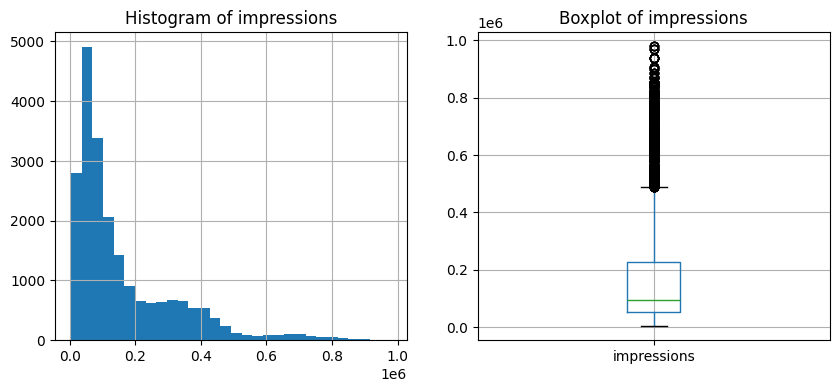

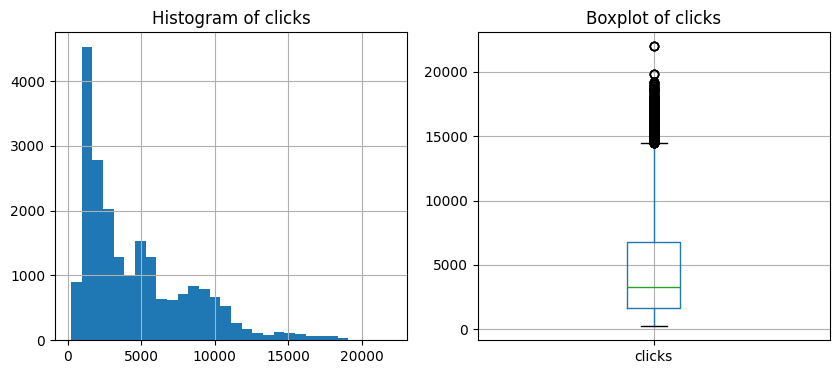

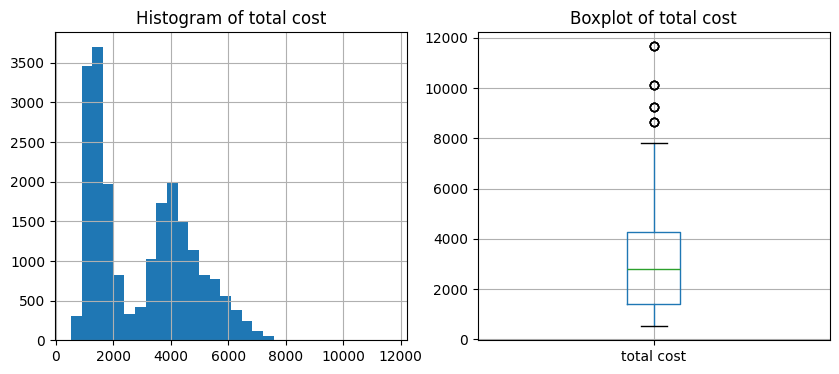

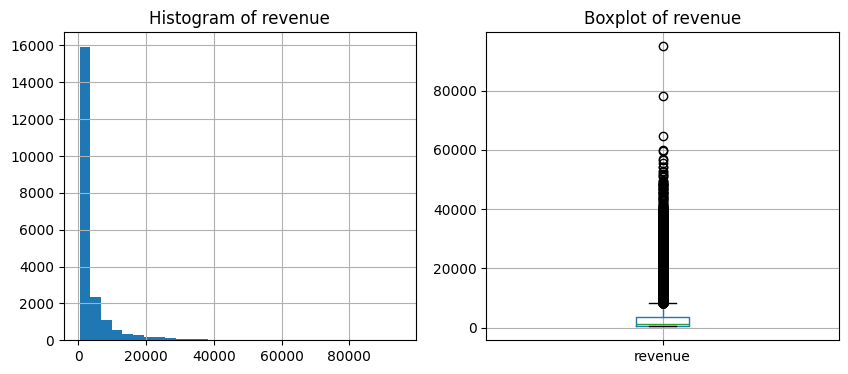

In [13]:
import matplotlib.pyplot as plt

numerical_cols = ['impressions', 'clicks', 'total cost', 'revenue']

for col in numerical_cols:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1,2,2)
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    
    plt.show()


store
Store A    5408
Store B    5408
Store C    5408
Store D    5092
Name: count, dtype: int64


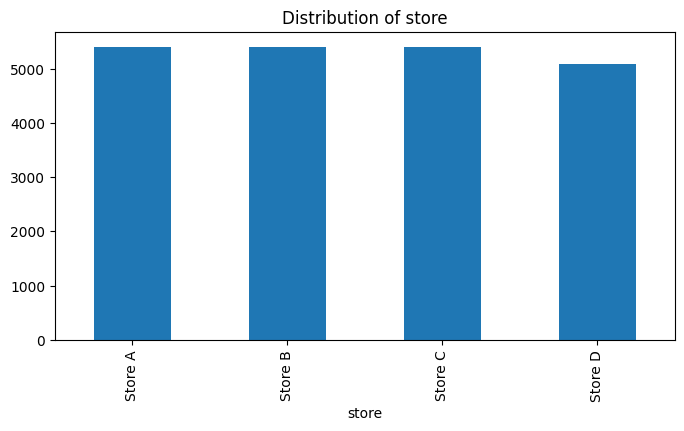

channel
channel_1        5329
channel_2        5329
channel_3        5329
channel_other    5329
Name: count, dtype: int64


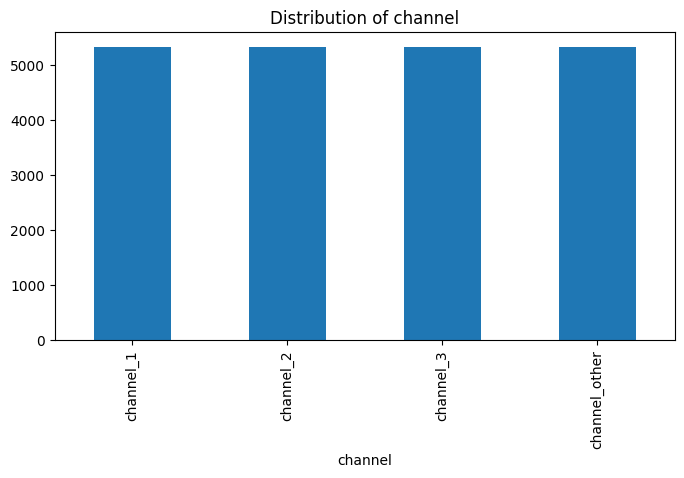

In [14]:
categorical_cols = ['store', 'channel']

for col in categorical_cols:
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar', figsize=(8,4), title=f'Distribution of {col}')
    plt.show()


In [15]:
df['CTR'] = df['clicks'] / df['impressions']


In [17]:
df['CPC'] = df['total cost'] / df['clicks']


In [18]:
df['ROI'] = df['revenue'] / df['total cost']


In [22]:
df[['CTR','CPC','ROI']].describe()


,CTR,CPC,ROI
count,21316.000000,21316.000000,21316.000000
mean,0.038505,0.788694,1.176730
std,0.023638,0.270192,1.495406
min,0.005801,0.317911,0.067451
25%,0.020326,0.565437,0.265286
50%,0.027670,0.740834,0.499442
75%,0.054622,0.994694,1.559481
max,0.128535,2.529558,26.846635


In [21]:
# Guardar dataset limpio
df.to_csv('../data/processed/marketing_cleaned.csv', index=False)


## Initial Insights from Marketing Dataset

### Data Quality
- The dataset is clean: no missing values or duplicates were found.
- Numerical columns (`impressions`, `clicks`, `total_cost`, `revenue`) show skewed distributions and some outliers, which should be considered in KPI analysis.

### KPI Summary
| Metric | Count | Mean | Std | Min | 25% | 50% | 75% | Max |
|--------|-------|------|-----|-----|-----|-----|-----|-----|
| CTR    | 21316 | 0.0385 | 0.0236 | 0.0058 | 0.0203 | 0.0277 | 0.0546 | 0.1285 |
| CPC    | 21316 | 0.7887 | 0.2702 | 0.3179 | 0.5654 | 0.7408 | 0.9947 | 2.5296 |
| ROI    | 21316 | 1.1767 | 1.4954 | 0.0675 | 0.2653 | 0.4994 | 1.5595 | 26.8466 |

**Interpretation:**

- **CTR (Click-Through Rate):**  
  - Average ~3.85%, indicating relatively low engagement.  
  - Top campaigns reach up to 12.85% CTR, showing that some channels perform significantly better.

- **CPC (Cost per Click):**  
  - Average ~$0.79 per click, with most campaigns between ~$0.57–$0.99.  
  - Outliers exist up to $2.53 per click; review campaigns with unusually high CPC.

- **ROI (Return on Investment):**  
  - Mean ROI ~1.18, indicating overall slightly profitable campaigns.  
  - Large variance (max ROI ~26.85) suggests that a few campaigns are highly profitable, while many others have ROI <1.  
  - 50% of campaigns have ROI <0.5 → opportunity to optimize spending.

### Next Steps
- Analyze channel-specific ROI and CPC to prioritize marketing spend.  
- Explore temporal trends by `date` to detect seasonality.  
- Visualize KPIs per store and channel for the dashboard.
